#  Dictionary exploratory analisis
In order to know what to expect from data extraciton with o dictionary, some analysis have been done to describe the information present in it.

Here I present the preprocessed dictionary and some of its characteristics. The preprocessed dictionary is a csv file with a row for every word in the dictionary and ten columns, one for every sentiment/emotion. Every observation is marked with a 1 or a 0, that indicate weather the word evokes a certain emotion or not. 
This preprocessing also decreases filesize for the original [NRC-Emotion-Lexicon](http://www.saifmohammad.com/WebPages/ResearchInterests.html).

In [6]:
df <- read.csv("streamTest02.csv", header = T)
names(df)
head(df)

[1] "anger"        "anticipation" "disgust"      "fear"         "joy"         
 [6] "negative"     "positive"     "sadness"      "surprise"     "trust"

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1,0,1,0,0,1,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [7]:
summary(df)
nrow(df)

     anger         anticipation       disgust            fear       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1652   Mean   :0.3235   Mean   :0.1073   Mean   :0.1836  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :4.0000   Max.   :4.0000   Max.   :3.0000   Max.   :3.0000  
      joy           negative        positive         sadness      
 Min.   :0.000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.000   Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :0.325   Mean   :0.312   Mean   :0.5293   Mean   :0.1644  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :5.000   Max.   :4.000   Max.   :5.0000   Max.   :3.0000  
    surprise          trust       
 Min.   :0.00

[1] 2609

### Total of emotions scored

In [8]:
colSums(df)

anger anticipation      disgust         fear          joy     negative 
         431          844          280          479          848          814 
    positive      sadness     surprise        trust 
        1381          429          401          793

## Percentage of emotions apperance

In [9]:
colSums(df)/nrow(df)*100

anger anticipation      disgust         fear          joy     negative 
    16.51974     32.34956     10.73208     18.35952     32.50287     31.19969 
    positive      sadness     surprise        trust 
    52.93216     16.44308     15.36987     30.39479

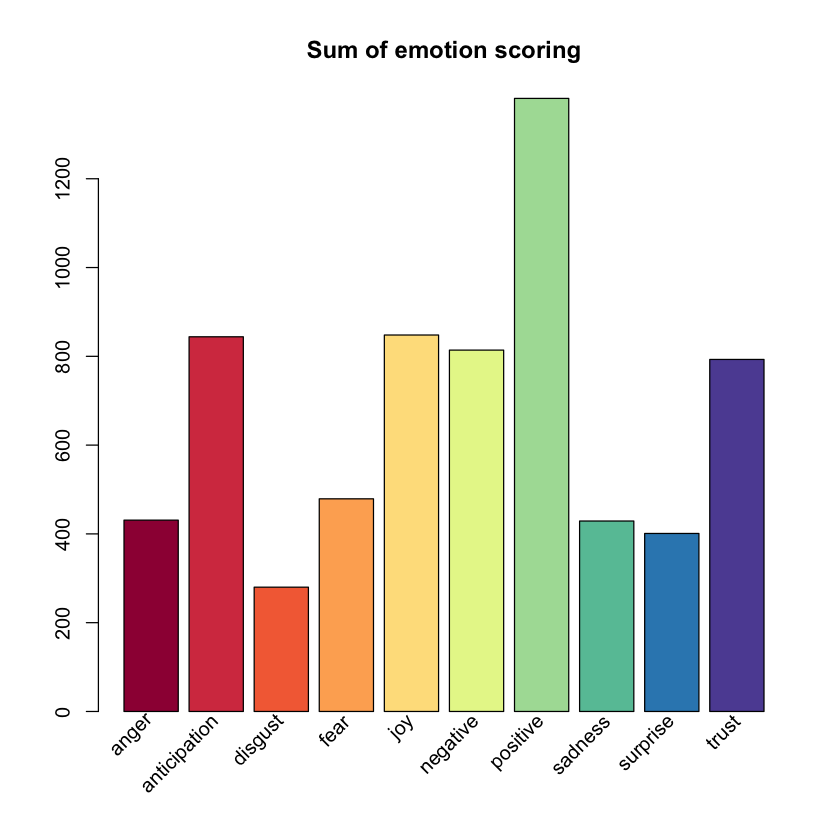

In [10]:
library(RColorBrewer)
bp <- barplot(colSums(df), col = brewer.pal(10, "Spectral"), main = "Sum of emotion scoring", axes = F, axisnames = F)
text(bp, par("usr")[3] - 0.5, labels = names(df), srt = 45, adj = 1, xpd = TRUE)
axis(2)

## Correlation matrix 
This matrix shows the correlation between every emotion. It is also shown with the help of a 

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
anger,1.00000000,0.02745835,0.55103200,0.55406591,0.02747574,0.64482432,0.02554775,0.50031379,0.15180864,0.05349477
anticipation,0.027458352,1.000000000,0.043163726,0.114797309,0.551926553,0.001930842,0.454399091,0.042045564,0.482218484,0.416975580
disgust,0.55103200,0.04316373,1.00000000,0.38164192,0.06149745,0.53271109,0.05602711,0.44287509,0.15582234,0.07819409
fear,0.554065911,0.114797309,0.381641921,1.000000000,-0.002570246,0.544721305,0.006628176,0.531945659,0.107550907,0.010309069
joy,0.027475740,0.551926553,0.061497447,-0.002570246,1.000000000,-0.021023358,0.779066587,0.035517575,0.548589604,0.562965105
negative,0.644824321,0.001930842,0.532711086,0.544721305,-0.021023358,1.000000000,-0.007109843,0.636549171,0.097365646,0.016253359
positive,0.025547752,0.454399091,0.056027110,0.006628176,0.779066587,-0.007109843,1.000000000,0.027549390,0.445672965,0.608961853
sadness,0.50031379,0.04204556,0.44287509,0.53194566,0.03551758,0.63654917,0.02754939,1.00000000,0.14730618,0.02929203
surprise,0.15180864,0.48221848,0.15582234,0.10755091,0.54858960,0.09736565,0.44567297,0.14730618,1.00000000,0.40443503
trust,0.05349477,0.41697558,0.07819409,0.01030907,0.56296510,0.01625336,0.60896185,0.02929203,0.40443503,1.00000000


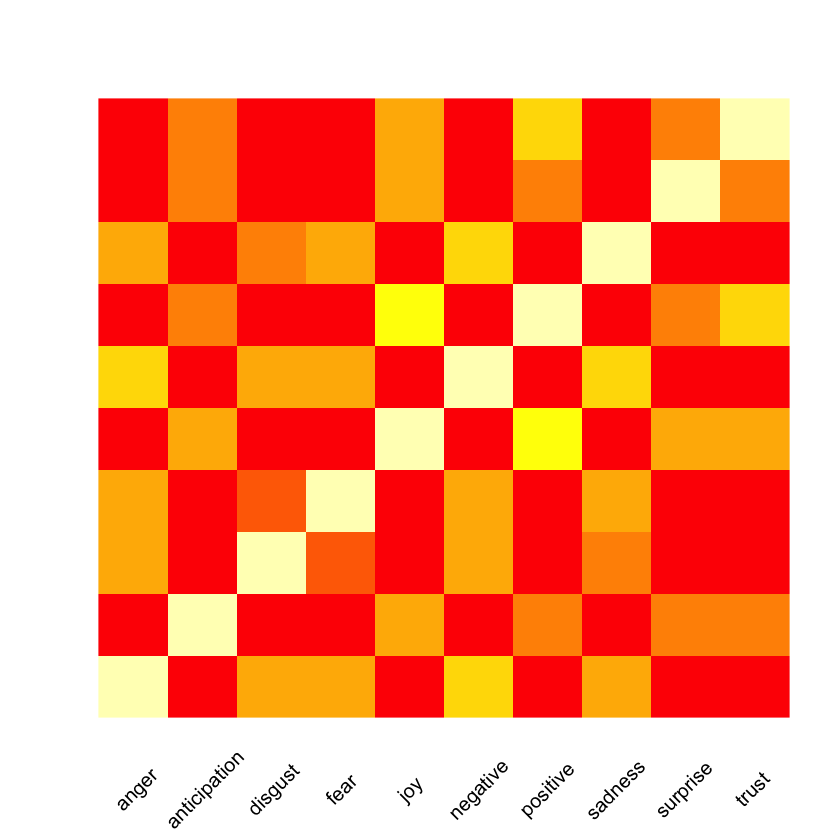

In [11]:
corm <- cor(df)
corm
image(corm, axes = F, xlab="",ylab="",col = heat.colors(10))
axis(1, at=seq(0, 1, by=0.1), labels = FALSE, tick=F)
# axis(2, at=seq(0, 1, by=0.12), labels = FALSE, tick=F)
text(seq(0, 1, by=0.11), par("usr")[3] - 0.1, labels = names(df), srt = 45, pos = 1, adj = 1, xpd = TRUE)

A heatmap with a correlation dendrogram can easily demonstrate how two major groups are created: One of positive emotions and one of negative emotions. 

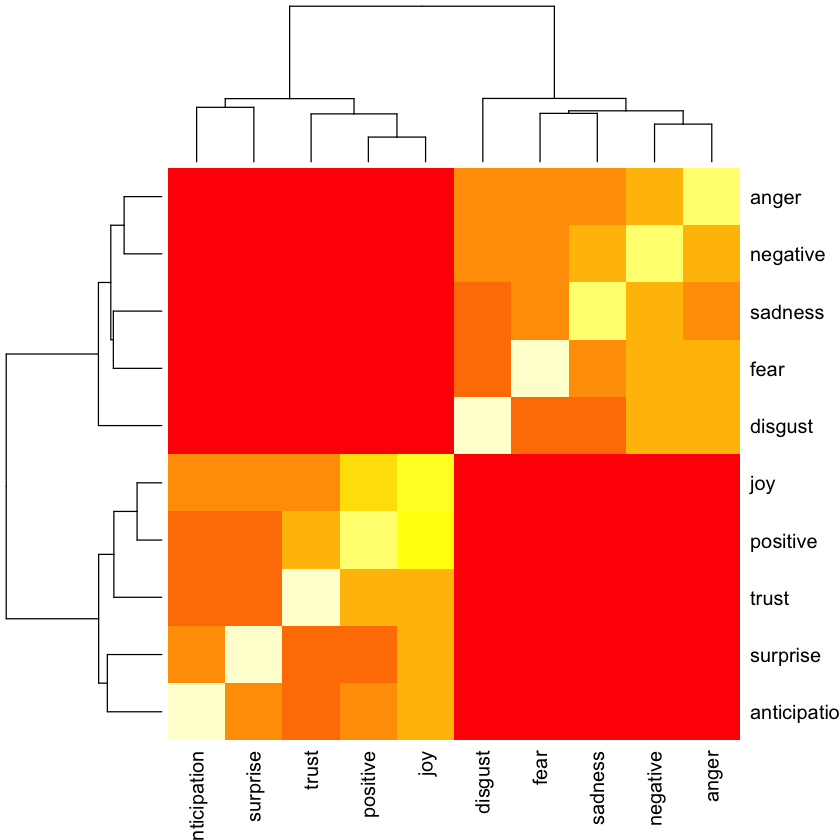

In [12]:
heatmap(cor(df))

More detailed dendrogram:

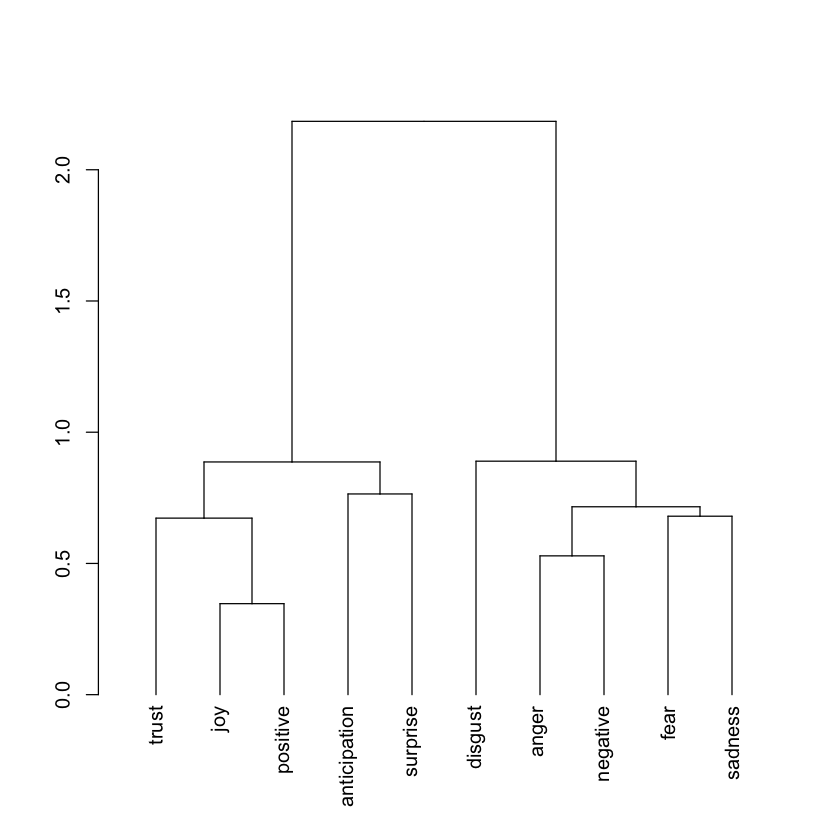

In [13]:
# dist(cor(df))
plot(as.dendrogram(hclust(dist(cor(df))))) # type = "triangle"